# EDA 

In [11]:
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from logreg import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
def training_images():
    with gzip.open('dataset/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def training_labels():
    with gzip.open('dataset/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels


def test_images():
    with gzip.open('dataset/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def test_labels():
    with gzip.open('dataset/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels


In [3]:
train = np.array(training_images())
train_label = np.array(training_labels())
test = np.array(test_images())
test_label = np.array(test_labels())

print(train.shape)
print(train_label.shape)
print(test.shape)
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<AxesSubplot:ylabel='count'>

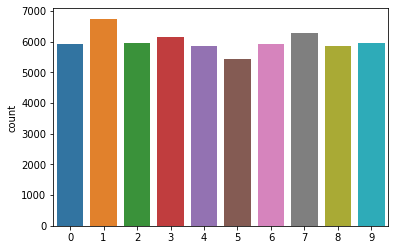

In [4]:
sns.countplot(train_label)

<AxesSubplot:ylabel='count'>

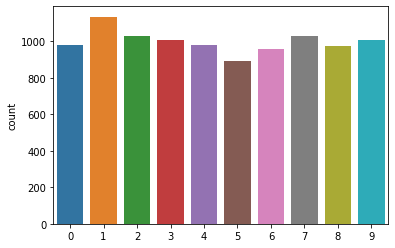

In [5]:
sns.countplot(test_label)

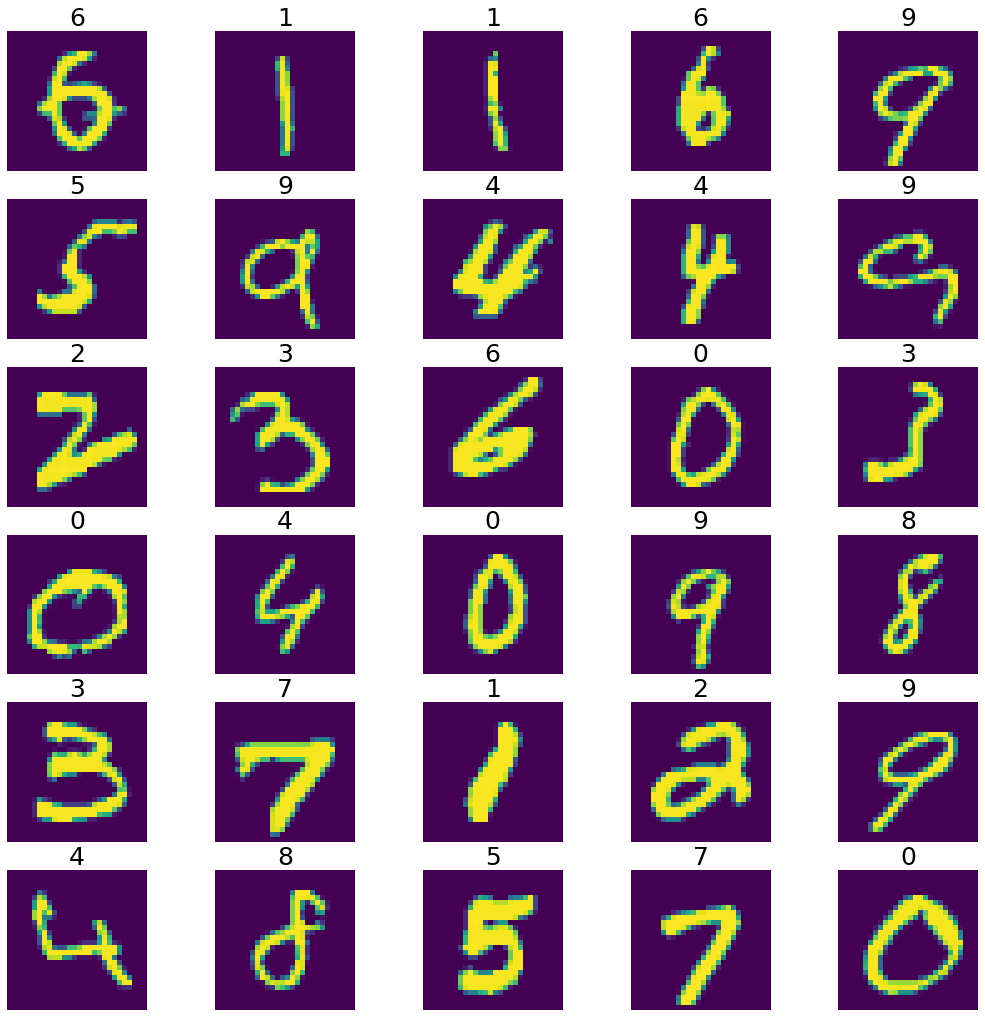

In [6]:
fig, axes= plt.subplots(6,5, figsize=(18,18))
axes= axes.flatten()
idx= np.random.randint(0,60000,size=30)
for i in range(30):
    axes[i].imshow(train[idx[i],:].reshape(28,28))
    axes[i].axis('off') #hide the axis ticks
    axes[i].set_title(str(int(train_label[idx[i]])), color='k',fontsize=25)
    
plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

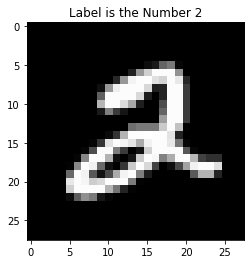

In [7]:

# Change This if You Want To See A Different Example (0-59999 as there are 60000 training examples)
idx = 5

# Include the Label in the Title -- y_train[idx]
plt.title("Label is the Number {}".format(train_label[idx]))

# Display the image -- x_train[idx]
plt.imshow(train[idx], cmap="gray")

# Print the Raw Pixel Values for The Image
print(train[idx])

# Code

In [8]:
train = np.array(training_images())/255
train_label = np.array(training_labels())
test = np.array(test_images())/255
test_label = np.array(test_labels())

In [9]:
LR = LogisticRegression(learning_rate=0.001,epoch=1,batch_size=50)
weight,bias = LR.fit(train,train_label)
softmax,one_hot = LR.predict(test,test_label,weight,bias)

In [20]:
print(classification_report(softmax,one_hot))
print('Accuracy')
print(accuracy_score(np.array(softmax), np.array(one_hot)))
print('Confusion Matrix')
print(confusion_matrix(softmax.argmax(axis=1), one_hot.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1023
           1       0.96      0.93      0.95      1175
           2       0.83      0.90      0.86       945
           3       0.86      0.85      0.85      1019
           4       0.85      0.90      0.87       932
           5       0.77      0.82      0.80       839
           6       0.92      0.91      0.91       975
           7       0.86      0.89      0.87       996
           8       0.81      0.79      0.80      1000
           9       0.87      0.80      0.83      1096

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000
 samples avg       0.87      0.87      0.87     10000

Accuracy
0.8701
[[ 930    0   15    8    4   21   18    5    8   14]
 [   0 1094   21    4    7    5    5   16   16    7]
 [   4    4  853   21   11    3    8   25    9    7]
 [   4    4 